In [112]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.stats import gaussian_kde

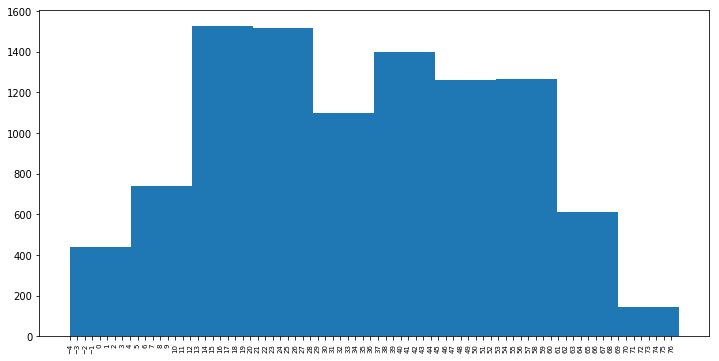

In [50]:
#2a

p = 0.5
record = []
x = 0
T = 10000

for t in range(T):
    record.append(x)
    if x==-4:
        x = -3
        continue
    x += 1-2*(np.random.random() < p)

plt.figure(figsize=(12,6))
plt.hist(record)
plt.xticks(range(-4,max(record)),rotation=90, fontsize=7)
plt.show()

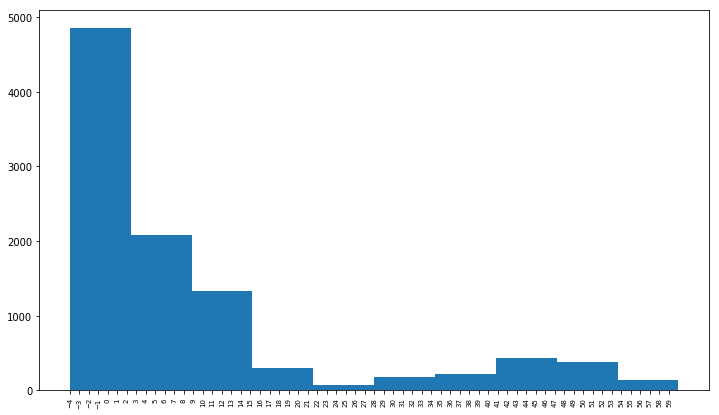

In [127]:
#2b

p = 0.5
record = []
x = 0
T = 10000

for t in range(T):
    record.append(x)
    if x==-4:
        x = -3
        continue
    if x==6:
        x = 5 if np.random.random() < .75 else 7
        
    x += 1-2*(np.random.random() < p)
    
plt.figure(figsize=(12,7))
plt.hist(record)
plt.xticks(range(-4,max(record)),rotation=90,fontsize=7)
plt.show()

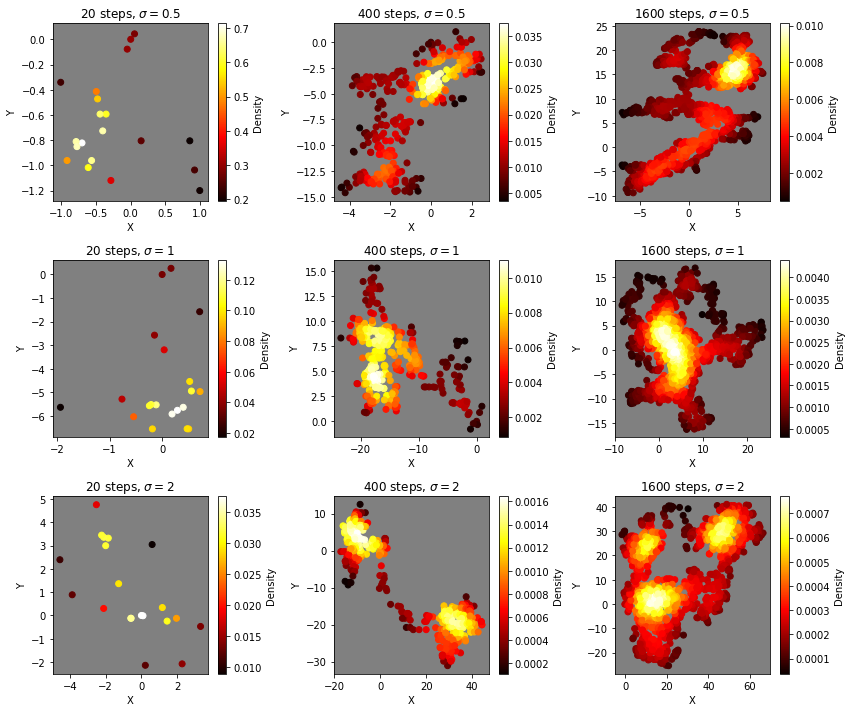

In [134]:
# 4
fig, axes = plt.subplots(3,3, figsize=(12,10))

S = [0.5,1,2]
T = [20,400,1600]

ax_number = 0

for i,ax in enumerate(axes.flatten()):
    
    s,t = list(itertools.product(S,T))[i]
    
    record = np.zeros((t,2)).astype('float64') 
    x = np.array([0,0]).astype('float64') 

    for _ in range(t):
        record[_] = x
        angle = np.random.randint(0,2*np.pi)
        step_size = np.random.normal(loc=0, scale=s)

        x += np.array([step_size*np.cos(angle),step_size*np.sin(angle)])

    density = gaussian_kde(dataset=record.T)(record.T)

    scatterplot = ax.scatter(record[:,0],record[:,1],c=density, cmap=plt.hot())
    plt.colorbar(label='Density',mappable=scatterplot, ax=ax)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(str(t)+' steps, $\sigma={}$'.format(s))
    ax.set_facecolor('grey')

plt.tight_layout()
plt.show()


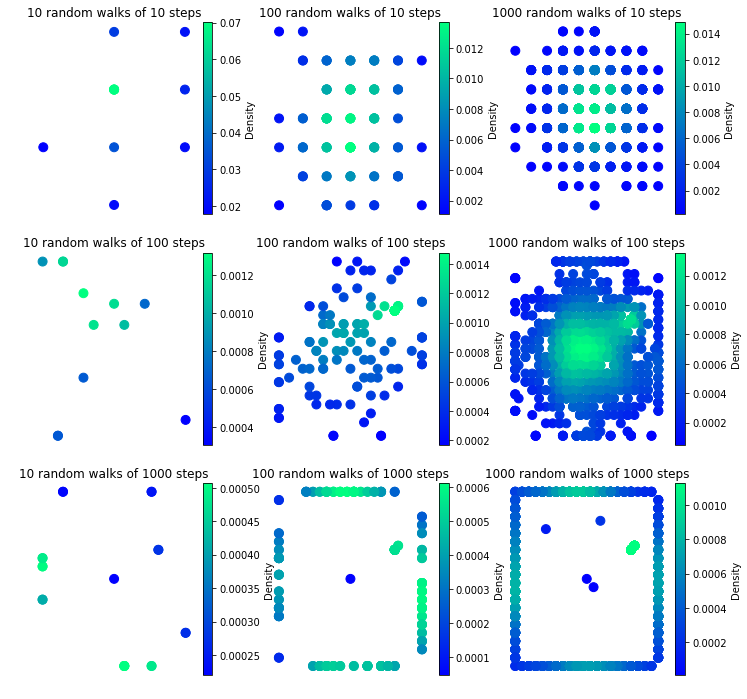

In [305]:
T=[10,100,1000]
W=[10,100,1000]


fig, axes = plt.subplots(3,3, figsize=(12,12))

for i,ax in enumerate(axes.flatten()):
    t,w = list(itertools.product(T,W))[i]

    final_positions = np.array([0,0])
    for _ in range(w):
        x = np.array([0,0]).astype('float64') 
        for _ in range(t):    
            if np.any(x > 20) or np.any(x < -20):
                final_positions = np.vstack((final_positions,x))
                break
            if x[0] in [13,14] and x[1] in [7,8]:
                final_positions = np.vstack((final_positions,x))
                break

            x += np.random.choice([-1,1],2)
        final_positions = np.vstack((final_positions,x))

    density = gaussian_kde(final_positions.T)(final_positions.T)
    
    scatterplot = ax.scatter(final_positions[:,0],final_positions[:,1], c=density, cmap='winter',s=80)
    ax.set_title('{} random walks of {} steps'.format(w,t))
    ax.axis('off')
    plt.colorbar(label='Density',mappable=scatterplot, ax=ax)


    
plt.show()